<img src = "https://images2.imgbox.com/32/ac/wucGkuem_o.png" width="300">

In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [3]:
# carregando dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [4]:
len(imagens_treino)

60000

In [5]:
imagens_treino.shape

(60000, 28, 28)

In [6]:
imagens_teste.shape

(10000, 28, 28)

In [7]:
len(identificacoes_teste)

10000

In [8]:
identificacoes_treino.min()

0

In [9]:
identificacoes_treino.max()

9

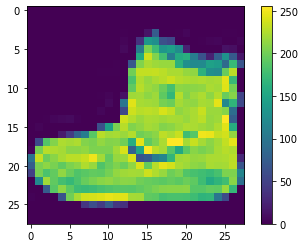

In [11]:
# Exibição dos dados
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar();

In [12]:
imagens_treino = imagens_treino/float(255)

In [13]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 1s 5ms/step - loss: 0.6569 - accuracy: 0.7699 - val_loss: 0.4626 - val_accuracy: 0.8354


In [14]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-2.9790580e-02, -7.5657837e-02, -5.8343772e-02, ...,
         4.9405307e-02, -5.7409525e-02,  5.0464444e-02],
       [ 1.0525139e-02,  7.9991370e-03,  1.4992780e-03, ...,
         6.5171972e-02, -5.4729581e-02, -7.5398199e-02],
       [ 1.1593014e-02,  6.8373241e-02,  1.2796021e-02, ...,
         5.1461473e-02,  4.4375349e-02, -3.4969773e-02],
       ...,
       [-8.2398448e-03,  2.0655464e-02,  8.3438426e-02, ...,
        -2.2080190e-02,  5.3588603e-02,  4.4716679e-02],
       [-8.0248816e-03,  1.4323387e-02, -5.5185910e-02, ...,
        -2.8722607e-02, -2.2485992e-02,  4.7622029e-02],
       [ 4.7365170e-02,  2.2911511e-02, -3.4283962e-02, ...,
         5.0738454e-05,  4.2020846e-02, -1.8073119e-02]], dtype=float32)

In [16]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 0.06416335, -0.01610654, -0.03501835, -0.01893858,  0.04135119,
       -0.01350276,  0.03898063,  0.047708  ,  0.08702587, -0.01403723,
        0.02366922,  0.00493381,  0.03454557, -0.001444  ,  0.03792029,
        0.0273016 , -0.02313286, -0.06145897, -0.01919759,  0.02605674,
        0.09097332,  0.0505171 ,  0.0575676 ,  0.07725724, -0.03086505,
        0.0405045 , -0.01733686,  0.04177024,  0.00357837,  0.09823033,
        0.04233816, -0.01555441, -0.00885513, -0.02458254, -0.04256171,
        0.0315193 , -0.02011053,  0.0218281 ,  0.08052058, -0.06188458,
        0.00240385,  0.01854132, -0.04669316,  0.04440199, -0.00299828,
        0.00272014,  0.0034669 ,  0.0838898 ,  0.02530468,  0.05691617,
       -0.01562861,  0.07816184, -0.02054034, -0.06211427, -0.01621678,
       -0.01104521,  0.05524433, -0.03681359, -0.00255965, -0.01354183,
        0.04183254, -0.01472669,  0.03061852, -0.03815803,  0.05775579,
       -0.0050317 , -0.00589742,  0.03764512, -0.00214326,  0.06

In [17]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.49731117, 0.18564045, 0.04865349, ..., 0.27191305, 0.9605693 ,
         0.08529501],
        [0.6322949 , 0.09136567, 0.9237363 , ..., 0.6548874 , 0.7622084 ,
         0.28315938],
        [0.25677815, 0.17543188, 0.29402646, ..., 0.13204423, 0.85150045,
         0.3628674 ],
        ...,
        [0.29127222, 0.32986423, 0.33148238, ..., 0.40266505, 0.2791677 ,
         0.48698866],
        [0.20561484, 0.7462483 , 0.08147697, ..., 0.4005971 , 0.9478515 ,
         0.10400402],
        [0.32532695, 0.7655084 , 0.5161454 , ..., 0.13709998, 0.11379006,
         0.6617391 ]], dtype=float32),
 array([ 0.06416335, -0.01610654, -0.03501835, -0.01893858,  0.04135119,
        -0.01350276,  0.03898063,  0.047708  ,  0.08702587, -0.01403723,
         0.02366922,  0.00493381,  0.03454557, -0.001444  ,  0.03792029,
         0.0273016 , -0.02313286, -0.06145897, -0.01919759,  0.02605674,
         0.09097332,  0.0505171 ,  0.0575676 ,  0.07725724, -0.03086505,
         0.0405045 , -0.01733

In [18]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 51.0507 - accuracy: 0.4155 - val_loss: 7.1339 - val_accuracy: 0.7327
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 12.1505 - accuracy: 0.6184 - val_loss: 4.7612 - val_accuracy: 0.7280
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 5.3185 - accuracy: 0.6603 - val_loss: 2.6894 - val_accuracy: 0.7107
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.8039 - accuracy: 0.6909 - val_loss: 1.7549 - val_accuracy: 0.7082
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4780 - accuracy: 0.7379 - val_loss: 0.8489 - val_accuracy: 0.8019


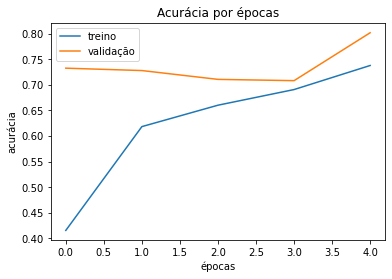

In [19]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação']);

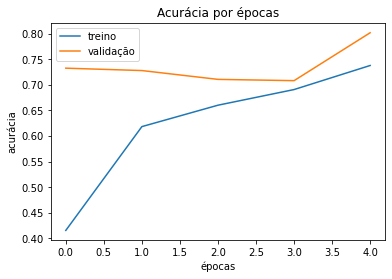

In [20]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação']);

In [21]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

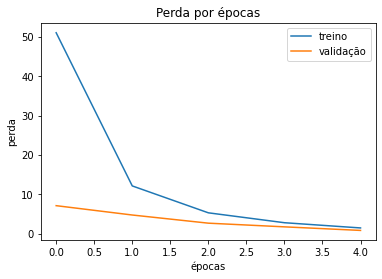

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação']);

In [23]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [24]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [25]:
# salvando e carregando modelo
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

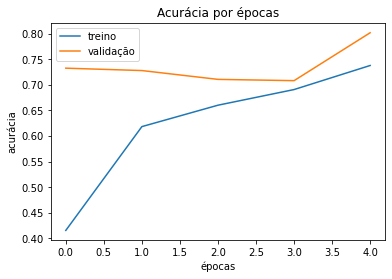

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação']);

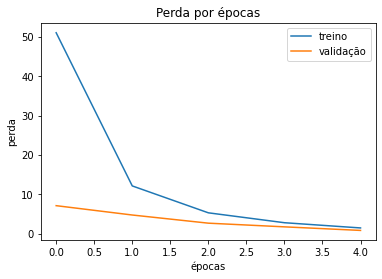

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação']);

In [28]:
# testando o modelo e o modelo salvo
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 8
número da imagem de teste: 2
resultado teste modelo salvo: 8
número da imagem de teste: 2


In [29]:
# avaliando modelo
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 22363.1855 - accuracy: 0.1000
Perda do teste: 22363.185546875
Acurácia do teste: 0.10000000149011612
